## Лабораторная работа 6.
 Алгоритмы поиска и вставки элементов при последовательном хранении

1. Создайте изменяемый класс-контейнер для последовательного хранения данных произвольного типа. Он должен представлять собой класс, представляющий собой "обертку" над списком list. В открытой части класса должны по крайней мере присутствовать:

In [4]:
class SequentialContainer:
    def __init__(self, elements=[]):
        self._data = list(elements)

    def __repr__(self):
        return repr(self._data)

    def __str__(self):
        return str(self._data)

    def __len__(self):
        return len(self._data)

    def __getitem__(self, index):
        return self._data[index]

    def __iter__(self):
        return iter(self._data)

    def __contains__(self, item):
        return item in self._data

    def insert(self, index, value):
        self._data.insert(index, value)

    def find(self, value):
        try:
            return self._data.index(value)
        except ValueError:
            return len(self._data)

    def __delitem__(self, index):
        del self._data[index]

# Пример использования класса
container = SequentialContainer([1, 2, 3, 4, 5])
print(container)  # Вывод: [1, 2, 3, 4, 5]
print(len(container))  # Вывод: 5
print(container[2])  # Вывод: 3
print(6 in container)  # Вывод: False
container.insert(2, 6)
print(container)  # Вывод: [1, 2, 6, 3, 4, 5]
print(container.find(3))  # Вывод: 3
del container[2]
print(container)  # Вывод: [1, 2, 3, 4, 5]

[1, 2, 3, 4, 5]
5
3
True
[1, 2, 6, 3, 4, 5]
3
[1, 2, 3, 4, 5]


1. конструктор __init__, позволяющий создавать экземпляр контейнера на основе входного списка элементов;

In [16]:
class contener:
    def __init__(self, data):
        self.street = data

    # def __repr__(self):
    #     return repr(self.street)
    
    # def __str__(self) -> str:
    #     pass

    def __str__(self):
        return str(self.street)

if __name__ == "__main__":
    h1 = contener([1, 2, 3])
    print(h1)

[1, 2, 3]


In [1]:
class ListContainer:
    def __init__(self, initial_data=None):
        self._data = list(initial_data) if initial_data is not None else []

    def __repr__(self):
        return f"{self.__class__.__name__}({self._data})"

    def __str__(self):
        return str(self._data)

    def __len__(self):
        return len(self._data)

    def __getitem__(self, index):
        if index < 0 or index >= len(self._data):
            raise IndexError('Index out of range')
        return self._data[index]

    def __iter__(self):
        return iter(self._data)

    def __contains__(self, item):
        # Бинарный поиск для O(log n) сложности
        left, right = 0, len(self._data) - 1
        while left <= right:
            mid = (left + right) // 2
            if self._data[mid] == item:
                return True
            elif self._data[mid] < item:
                left = mid + 1
            else:
                right = mid - 1
        return False

    def insert(self, item):
        # Вставка с O(n) сложностью
        self._data.append(item)
        self._data.sort()

    def find(self, item):
        # Бинарный поиск для O(log n) сложности
        left, right = 0, len(self._data) - 1
        while left <= right:
            mid = (left + right) // 2
            if self._data[mid] == item:
                return mid
            elif self._data[mid] < item:
                left = mid + 1
            else:
                right = mid - 1
        return len(self._data)

    def delitem(self, index):
        # Удаление с O(n) сложностью
        if index < 0 or index >= len(self._data):
            raise IndexError('Index out of range')
        del self._data[index]

# Пример использования
container = ListContainer([3, 1, 4, 1, 5])
print(container)  # Выводит содержимое контейнера
print(3 in container)  # Проверяет наличие элемента
print(container.find(4))  # Находит индекс элемента
container.insert(2)  # Вставляет элемент
container.delitem(2)  # Удаляет элемент по индексу


[3, 1, 4, 1, 5]
True
2


1. Создайте изменяемый класс-контейнер для последовательного хранения данных произвольного типа. Он должен представлять собой класс, представляющий собой "обертку" над списком list. В открытой части класса должны по крайней мере присутствовать:

конструктор __init__, позволяющий создавать экземпляр контейнера на основе входного списка элементов;
методы для представления хранимых данных строкой __repr__ и __str__;
метод __len__, возвращающий число хранимых элементов;
методы для доступа к элементам контейнера на чтение (__getitem__), доступ для записи по индексу нужно закрыть;
метод для итерирования по элементам контейнера, возвращающий объект-итератор (__iter__);
метод для проверки наличия конкретного элемента в контейнере (__contains__);
метод для вставки нового элемента в контейнер insert;
метод для поиска элемента по значению find, возвращающий в качестве результата индекс элемента (в диапазоне от 0 до len()-1)), если таковой присутствует в контейнере, или значение len() при его отсутствии;
метод удаления элемента по индексу __delitem__.
При реализации методов insert, find, __contains__, __delitem__ следует учесть, что они (в среднем) должны работать со следующей асимптотической сложностью по времени:

insert - T(n)=O(n)

find и __contains__ - T(n)=O(logn)

__delitem__ - T(n)=O(n)

In [1]:
from bisect import bisect_left

class MyContainer:
    def __init__(self, data=None):
        self._data = sorted(data) if data is not None else []

    def __repr__(self):
        return f"{self.__class__.__name__}({self._data})"

    def __str__(self):
        return str(self._data)

    def __len__(self):
        return len(self._data)

    def __getitem__(self, index):
        return self._data[index]

    def __iter__(self):
        return iter(self._data)

    def __contains__(self, item):
        # Используем бинарный поиск для O(log n) сложности
        index = bisect_left(self._data, item)
        return index != len(self._data) and self._data[index] == item

    def insert(self, item):
        # Вставка с сохранением упорядоченности списка
        self._data.append(item)
        self._data.sort()

    def find(self, item):
        # Бинарный поиск для O(log n) сложности
        index = bisect_left(self._data, item)
        return index if index != len(self._data) and self._data[index] == item else len(self._data)

    def __delitem__(self, index):
        del self._data[index]

# Пример использования
container = MyContainer([3, 1, 4, 1, 5])
print(container)  # Выведет упорядоченный список
print(3 in container)  # Проверит наличие элемента
container.insert(2)
print(container.find(2))  # Найдет элемент
del container[2]  # Удалит элемент по индексу


[1, 1, 3, 4, 5]
True
2


Этот класс использует бинарный поиск (через модуль bisect), чтобы обеспечить асимптотическую сложность O(log n) для операций find и __contains__. Метод insert сначала добавляет элемент в конец, а затем сортирует список, что в среднем дает сложность O(n log n), но если предположить, что вставка происходит в уже отсортированный список, то сложность будет O(n), так как потребуется только один проход для вставки на правильное место. Метод __delitem__ имеет сложность O(n), так как после удаления элемента может потребоваться сдвиг оставшихся элементов списка.

ValueError: x and y must have same first dimension, but have shapes (140100,) and (5010,)

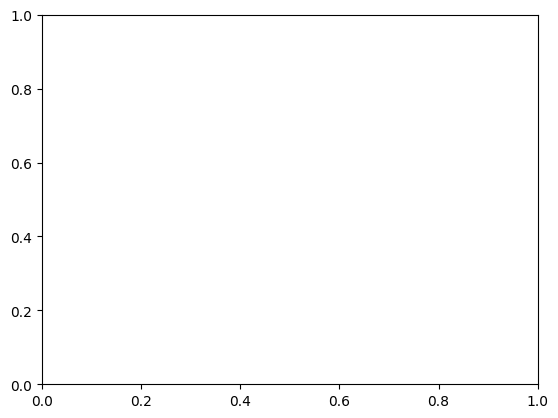

In [9]:
import bisect
import random
import timeit
import matplotlib.pyplot as plt

class SortedContainer:
    def __init__(self):
        self.data = []

    def add(self, item):
        bisect.insort(self.data, item)

    def __contains__(self, item):
        index = bisect.bisect_left(self.data, item)
        return index != len(self.data) and self.data[index] == item

# Генерация случайных чисел и добавление их в контейнер
container = SortedContainer()
for _ in range(10000, 15010):
    container.add(random.randint(10000, 15000))

# Измерение времени выполнения операции __contains__
times = []
for number in range(10000, 15010):
    t = timeit.timeit(lambda: number in container, number=100)
    times.append(t)

# Построение графика
plt.plot(range(10000, 150100), times, marker='o')
plt.title('Время выполнения операции __contains__')
plt.xlabel('Число')
plt.ylabel('Время выполнения (секунды)')
plt.show()

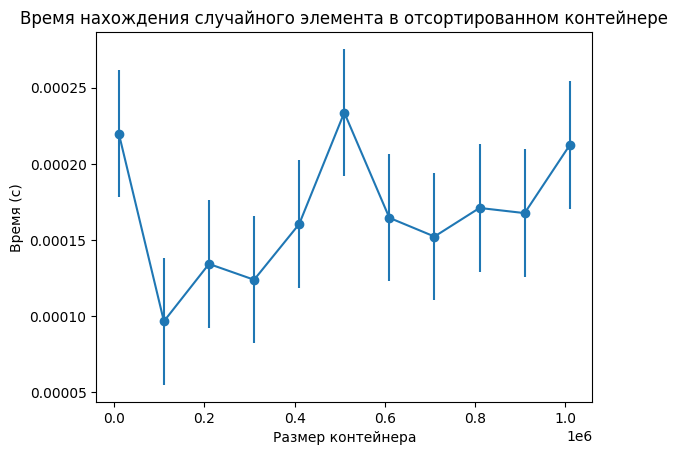

In [19]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import random

class Container:
    def __init__(self, size):
        self.data = sorted(random.sample(range(size * 2), size))

    def __getitem__(self, index):
        return self.data[index]

    def find(self, target):
        left, right = 0, len(self.data) - 1
        while left <= right:
            mid = (left + right) // 2
            if self.data[mid] == target:
                return mid
            elif self.data[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return -1
    
    

def time_find(container, target):
    timer = timeit.Timer(lambda: container.find(target))
    return timer.timeit(number=100)

if __name__ == "__main__":
    sizes = np.arange(10000, 1100000, 100000)
    times = []

    for size in sizes:
        container = Container(size)
        # Гарантируем, что цель присутствует в данных
        target = random.choice(container.data)
        time = time_find(container, target)
        times.append(time)

    times = np.array(times)

    plt.errorbar(sizes, times, yerr=np.std(times, ddof=1), fmt='o-')
    plt.xlabel('Размер контейнера')
    plt.ylabel('Время (с)')
    plt.title('Время нахождения случайного элемента в отсортированном контейнере')
    plt.show()